In [255]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import dateparser
%matplotlib inline 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
nameMap = {'毛里求斯':'Mauritius','圣皮埃尔和密克隆群岛':'St. Pierre and Miquelon','安圭拉':'Anguilla','荷兰加勒比地区':'Caribbean Netherlands','圣巴泰勒米岛':'Saint Barthelemy','英属维尔京群岛':'British Virgin Is.','科摩罗':'Comoros','蒙特塞拉特':'Montserrat','塞舌尔':'Seychelles','特克斯和凯科斯群岛':'Turks and Caicos Is.','梵蒂冈':'Vatican','圣其茨和尼维斯':'Saint Kitts and Nevis','库拉索岛':'Curaçao','多米尼克':'Dominica','圣文森特和格林纳丁斯':'St. Vin. and Gren.','斐济':'Fiji','圣卢西亚':'Saint Lucia','北马里亚纳群岛联邦':'N. Mariana Is.','格林那达':'Grenada','安提瓜和巴布达':'Antigua and Barb.','列支敦士登':'Liechtenstein','圣马丁岛':'Saint Martin','法属波利尼西亚':'Fr. Polynesia','美属维尔京群岛':'U.S. Virgin Is.','荷属圣马丁':'Sint Maarten','巴巴多斯':'Barbados','开曼群岛':'Cayman Is.','摩纳哥':'Monaco','阿鲁巴':'Aruba','特立尼达和多巴哥':'Trinidad and Tobago','钻石公主号邮轮':'Princess','瓜德罗普岛':'Guadeloupe','关岛':'Guam','直布罗陀':'Gibraltar','马提尼克':'Martinique','马耳他':'Malta','法罗群岛':'Faeroe Is.','圣多美和普林西比':'São Tomé and Principe','安道尔':'Andorra','根西岛':'Guernsey','泽西岛':'Jersey','佛得角':'Cape Verde','马恩岛':'Isle of Man','留尼旺':'Reunion','圣马力诺':'San Marino','马尔代夫':'Maldives','马约特':'Mayotte','巴林':'Bahrain','新加坡': 'Singapore Rep.', '多米尼加': 'Dominican Rep.', '巴勒斯坦': 'Palestine', '巴哈马': 'The Bahamas', '东帝汶': 'East Timor', '阿富汗': 'Afghanistan', '几内亚比绍': 'Guinea Bissau', '科特迪瓦': "Côte d'Ivoire", '锡亚琴冰川': 'Siachen Glacier', '英属印度洋领土': 'Br. Indian Ocean Ter.', '安哥拉': 'Angola', '阿尔巴尼亚': 'Albania', '阿联酋': 'United Arab Emirates', '阿根廷': 'Argentina', '亚美尼亚': 'Armenia', '法属南半球和南极领地': 'French Southern and Antarctic Lands', '澳大利亚': 'Australia', '奥地利': 'Austria', '阿塞拜疆': 'Azerbaijan', '布隆迪共和国': 'Burundi', '比利时': 'Belgium', '贝宁': 'Benin', '布基纳法索': 'Burkina Faso', '孟加拉国': 'Bangladesh', '保加利亚': 'Bulgaria', '波黑': 'Bosnia and Herz.', '白俄罗斯': 'Belarus', '伯利兹': 'Belize', '百慕大': 'Bermuda', '玻利维亚': 'Bolivia', '巴西': 'Brazil', '文莱': 'Brunei', '不丹': 'Bhutan', '博茨瓦纳': 'Botswana', '中非共和国': 'Central African Rep.', '加拿大': 'Canada', '瑞士': 'Switzerland', '智利': 'Chile', '中国': 'China', '象牙海岸': 'Ivory Coast', '喀麦隆': 'Cameroon', '刚果（金）': 'Dem. Rep. Congo', '刚果（布）': 'Congo', '哥伦比亚': 'Colombia', '哥斯达黎加': 'Costa Rica', '古巴': 'Cuba', '北塞浦路斯': 'N. Cyprus', '塞浦路斯': 'Cyprus', '捷克': 'Czech Rep.', '德国': 'Germany', '吉布提': 'Djibouti', '丹麦': 'Denmark', '阿尔及利亚': 'Algeria', '厄瓜多尔': 'Ecuador', '埃及': 'Egypt', '厄立特里亚': 'Eritrea', '西班牙': 'Spain', '爱沙尼亚': 'Estonia', '埃塞俄比亚': 'Ethiopia', '芬兰': 'Finland', '斐': 'Fiji', '福克兰群岛': 'Falkland Islands', '法国': 'France', '加蓬': 'Gabon', '英国': 'United Kingdom', '格鲁吉亚': 'Georgia', '加纳': 'Ghana', '几内亚': 'Guinea', '冈比亚': 'Gambia', '赤道几内亚': 'Eq. Guinea', '希腊': 'Greece', '格陵兰': 'Greenland', '危地马拉': 'Guatemala', '法属圭亚那': 'French Guiana', '圭亚那': 'Guyana', '洪都拉斯': 'Honduras', '克罗地亚': 'Croatia', '海地': 'Haiti', '匈牙利': 'Hungary', '印度尼西亚': 'Indonesia', '印度': 'India', '爱尔兰': 'Ireland', '伊朗': 'Iran', '伊拉克': 'Iraq', '冰岛': 'Iceland', '以色列': 'Israel', '意大利': 'Italy', '牙买加': 'Jamaica', '约旦': 'Jordan', '日本': 'Japan', '哈萨克斯坦': 'Kazakhstan', '肯尼亚': 'Kenya', '吉尔吉斯斯坦': 'Kyrgyzstan', '柬埔寨': 'Cambodia', '韩国': 'Korea', '科索沃': 'Kosovo', '科威特': 'Kuwait', '老挝': 'Lao PDR', '黎巴嫩': 'Lebanon', '利比里亚': 'Liberia', '利比亚': 'Libya', '斯里兰卡': 'Sri Lanka', '莱索托': 'Lesotho', '立陶宛': 'Lithuania', '卢森堡': 'Luxembourg', '拉脱维亚': 'Latvia', '摩洛哥': 'Morocco', '摩尔多瓦': 'Moldova', '马达加斯加': 'Madagascar', '墨西哥': 'Mexico', '北马其顿': 'Macedonia', '马里': 'Mali', '缅甸': 'Myanmar', '黑山': 'Montenegro', '蒙古': 'Mongolia', '莫桑比克': 'Mozambique', '毛里塔尼亚': 'Mauritania', '马拉维': 'Malawi', '马来西亚': 'Malaysia', '纳米比亚': 'Namibia', '新喀里多尼亚': 'New Caledonia', '尼日尔': 'Niger', '尼日利亚': 'Nigeria', '尼加拉瓜': 'Nicaragua', '荷兰': 'Netherlands', '挪威': 'Norway', '尼泊尔': 'Nepal', '新西兰': 'New Zealand', '阿曼': 'Oman', '巴基斯坦': 'Pakistan', '巴拿马': 'Panama', '秘鲁': 'Peru', '菲律宾': 'Philippines', '巴布亚新几内亚': 'Papua New Guinea', '波兰': 'Poland', '波多黎各': 'Puerto Rico', '朝鲜': 'Dem. Rep. Korea', '葡萄牙': 'Portugal', '巴拉圭': 'Paraguay', '卡塔尔': 'Qatar', '罗马尼亚': 'Romania', '俄罗斯': 'Russia', '卢旺达': 'Rwanda', '西撒哈拉': 'W. Sahara', '沙特阿拉伯': 'Saudi Arabia', '苏丹': 'Sudan', '南苏丹': 'S. Sudan', '塞内加尔': 'Senegal', '所罗门群岛': 'Solomon Is.', '塞拉利昂': 'Sierra Leone', '萨尔瓦多': 'El Salvador', '索马里兰': 'Somaliland', '索马里': 'Somalia', '塞尔维亚': 'Serbia', '苏里南': 'Suriname', '斯洛伐克': 'Slovakia', '斯洛文尼亚': 'Slovenia', '瑞典': 'Sweden', '斯威士兰': 'Swaziland', '叙利亚': 'Syria', '乍得': 'Chad', '多哥': 'Togo', '泰国': 'Thailand', '塔吉克斯坦': 'Tajikistan', '土库曼斯坦': 'Turkmenistan', '特里尼达和多巴哥': 'Trinidad and Tobago', '突尼斯': 'Tunisia', '土耳其': 'Turkey', '坦桑尼亚': 'Tanzania', '乌干达': 'Uganda', '乌克兰': 'Ukraine', '乌拉圭': 'Uruguay', '美国': 'United States', '乌兹别克斯坦': 'Uzbekistan', '委内瑞拉': 'Venezuela', '越南': 'Vietnam', '瓦努阿图': 'Vanuatu', '西岸': 'West Bank', '也门共和国': 'Yemen', '南非': 'South Africa', '赞比亚共和国': 'Zambia', '津巴布韦': 'Zimbabwe'}
nameList = ['中国','美国','巴西','印度','巴基斯坦','英国','阿富汗','墨西哥','南非','乌克兰']
file  = 'F:/I_love_learning/junior/机器学习/课程设计/data/data_use/dataFrame/'

In [191]:
#读数据
confirmedCount=pd.read_excel(file + 'confirmedCount' +'.xlsx').set_index('dateId')
curedCount=pd.read_excel(file + 'curedCount' +'.xlsx').set_index('dateId')
deadCount = pd.read_excel(file + 'deadCount' +'.xlsx').set_index('dateId')
confirmedCount

,中国,美国,巴西,印度,巴基斯坦,英国,阿富汗,墨西哥,南非,乌克兰
dateId,,,,,,,,,,
20210101,96807,20074798,7675973,10266674,482178,2488780,52330,1426094,1057161,1055047
20210102,96894,20136182,7700578,10286709,484362,2542065,52586,1437185,1073887,1069517
20210103,96972,20430979,7716405,10305788,486634,2599789,52586,1443544,1088889,1074093
20210104,97061,20639854,7733746,10323965,488529,2654779,52709,1448755,1100748,1078251
20210105,97127,20823856,7754560,10340469,490476,2713563,52709,1455219,1113349,1083585
...,...,...,...,...,...,...,...,...,...,...
20210410,103083,31085251,13373174,13060542,715968,4370325,57019,2272064,1556242,1841137
20210411,103113,31151493,13445006,13205926,715968,4370325,57144,2272064,1557527,1841137
20210412,103136,31197872,13482543,13358805,725602,4370325,57242,2280213,1558458,1861105


In [192]:
#求和（每天的人数）

world_cases = confirmedCount.sum(axis=1)

In [113]:
X_data = world_cases.index.values
X_data = X_data.reshape(-1,1).astype(str)
X_time = X_data
for i in range(X_data.size):
    X_time[i] = (parse(X_data[i][0]))


In [94]:
days_since_1_1 = np.array([i for i in range(len(world_cases[0:-3]))]).reshape(-1, 1)
future_forcast = np.array([i for i in range(len(world_cases))]).reshape(-1, 1)

In [91]:
#划分数据集

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, world_cases[0:-3].values, test_size=0.1, shuffle=False)
y_train_confirmed = y_train_confirmed.reshape(-1,1)
X_train_confirmed = X_train_confirmed.reshape(-1,1)
X_test_confirmed = X_test_confirmed.reshape(-1,1)
y_test_confirmed = y_test_confirmed.reshape(-1,1)
y_train_confirmed

44675842

In [88]:
kernel = ['linear', 'rbf']
# c是错误的惩罚参数C.默认1
c = [0.01, 0.1, 1, 10]
# gamma是'rbf'，'poly'和'sigmoid'的核系数。默认是'auto'
gamma = [0.01, 0.1, 1]
# Epsilon在epsilon-SVR模型中。它指定了epsilon-tube，其中训练损失函数中没有惩罚与在实际值的距离epsilon内预测的点。默认值是0.1
epsilon = [0.01, 0.1, 1]
# shrinking指明是否使用收缩启发式。默认为True
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
# 建立支持向量回归模型
svm = SVR()
# 使用随机搜索进行超参优化
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [92]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'linear', 'gamma': 0.01, 'epsilon': 1, 'C': 10}

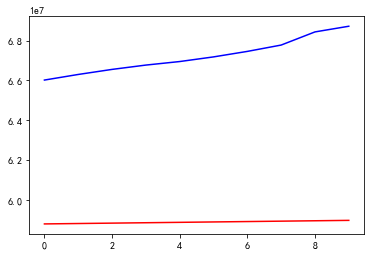

In [95]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred,'r')
plt.plot(y_test_confirmed,'b')

In [97]:
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)],
                 'criterion': ['mse', 'mae'],
                 'bootstrap': [True, False],
                 }
ensemble = RandomForestRegressor()
ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


F:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [99]:
ensemble_search.best_params_

{'n_estimators': 170, 'criterion': 'mae', 'bootstrap': False}

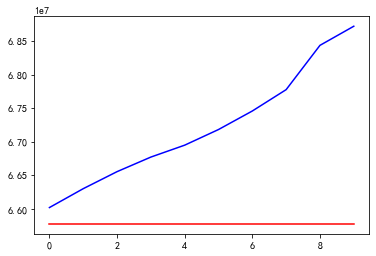

In [101]:
ensemble_confirmed = ensemble_search.best_estimator_
ensemble_pred = ensemble_confirmed.predict(future_forcast)
# check against testing data
ensemble_test_pred = ensemble_confirmed.predict(X_test_confirmed)
plt.plot(ensemble_test_pred,'r')
plt.plot(y_test_confirmed,'b')

In [103]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 28135849.595339
MSE: 796052126730442.8


In [105]:
linear_model.coef_

array([[1019787.62134052]])

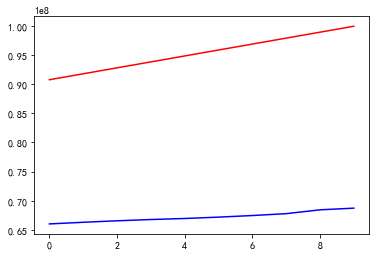

In [107]:
plt.plot(y_test_confirmed,'b')
plt.plot(test_linear_pred,'r')

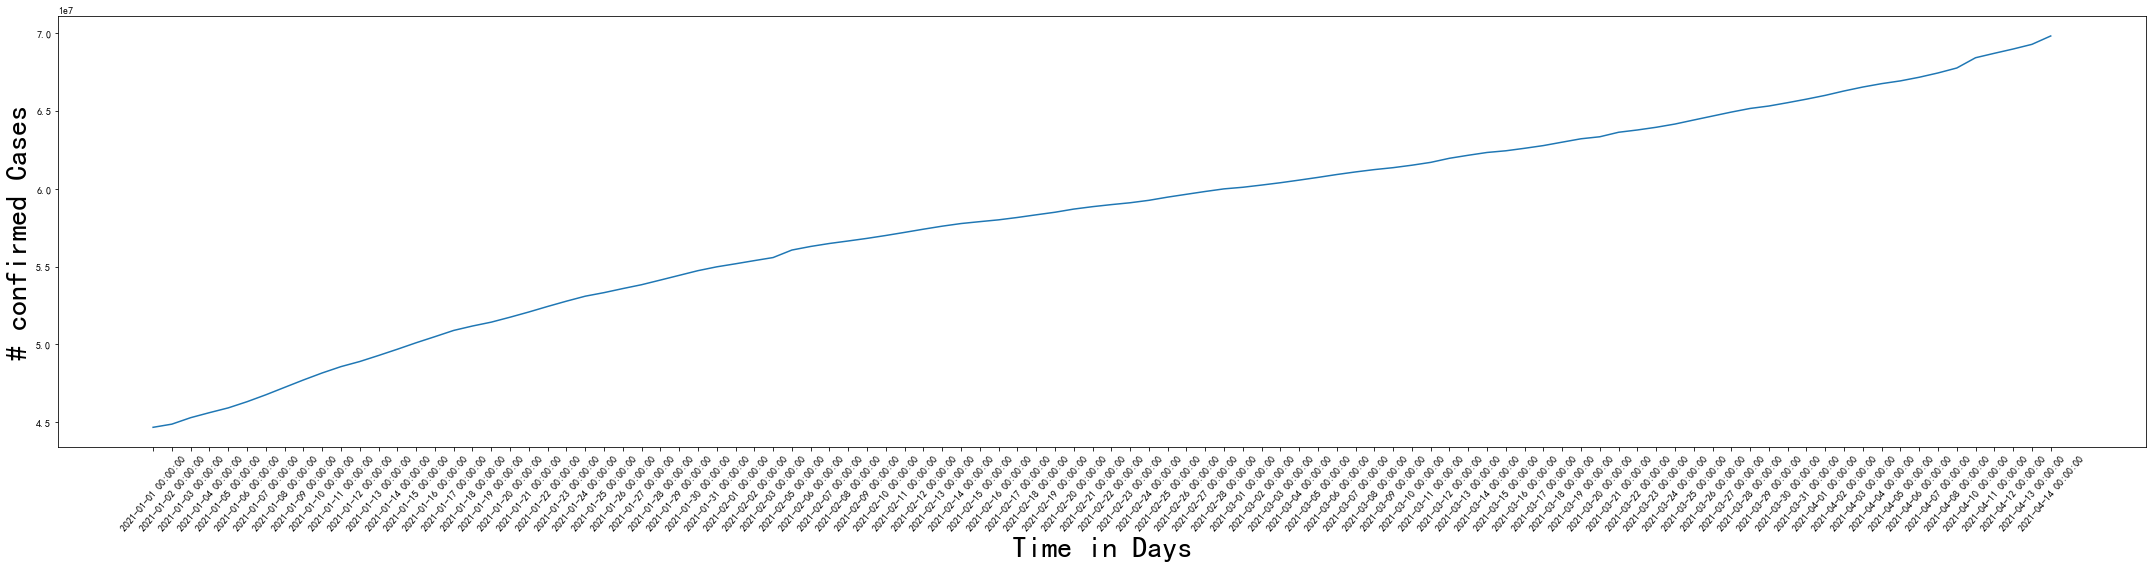

In [156]:
plt.figure(figsize=(30,8))
x = plt.plot(X_time.reshape(-1),world_cases.values.tolist())
plt.xlabel('Time in Days', size=30)
plt.ylabel('# confirmed Cases', size=30)
plt.xticks(rotation=50, size=10)
plt.tight_layout()

plt.show()

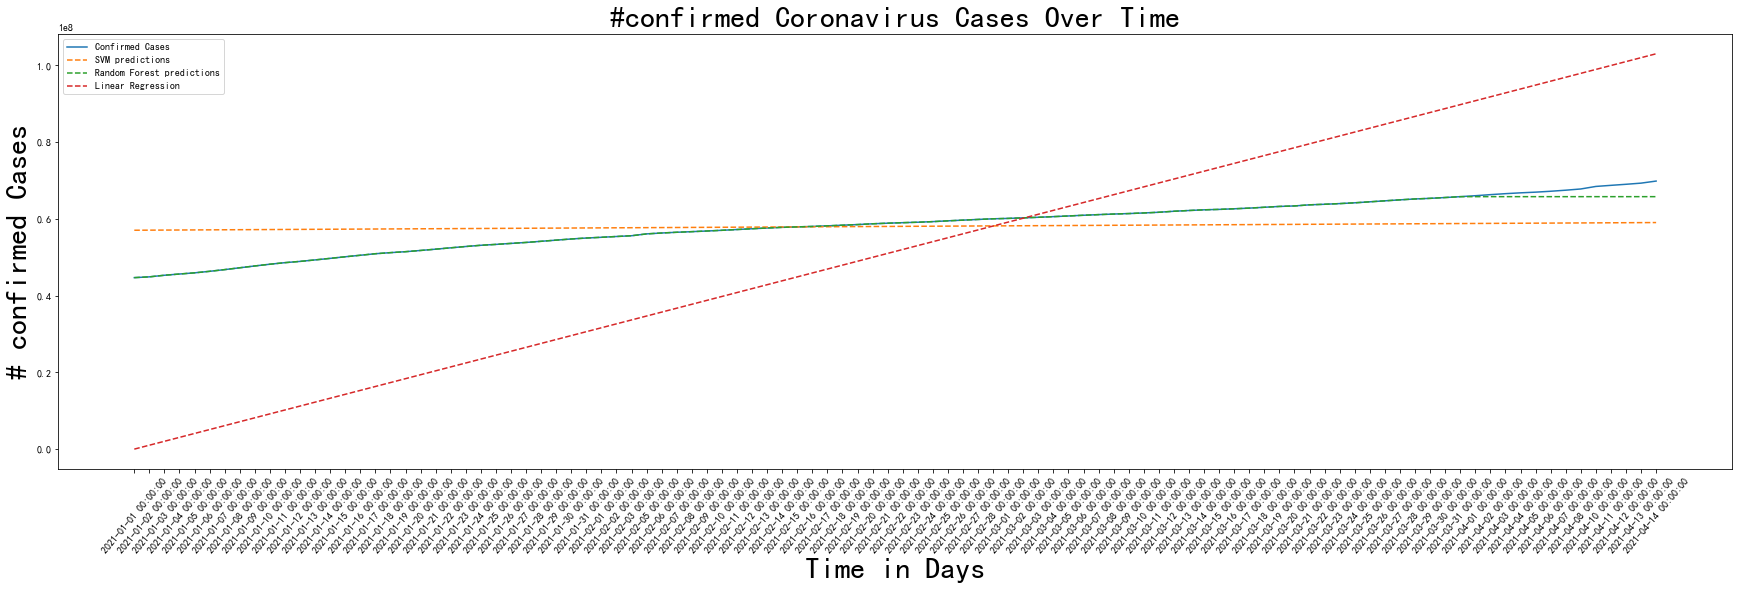

In [160]:
plt.figure(figsize=(30,8))
plt.plot(X_time.reshape(-1), world_cases.values.tolist())
plt.plot(X_time.reshape(-1), svm_pred, linestyle='dashed')
plt.plot(X_time.reshape(-1), ensemble_pred, linestyle='dashed')
plt.plot(X_time.reshape(-1), linear_pred, linestyle='dashed')
plt.title('#confirmed Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('# confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Random Forest predictions', 'Linear Regression'])
plt.xticks(rotation=50, size=10)
plt.show()

In [167]:
total_deaths = deadCount.sum(axis=1)
total_deaths

dateId
20210101     954391
20210102     957815
20210103     961937
20210104     965160
20210105     969620
             ...   
20210410    1547130
20210411    1551415
20210412    1557447
20210413    1561605
20210414    1574062
Length: 102, dtype: int64

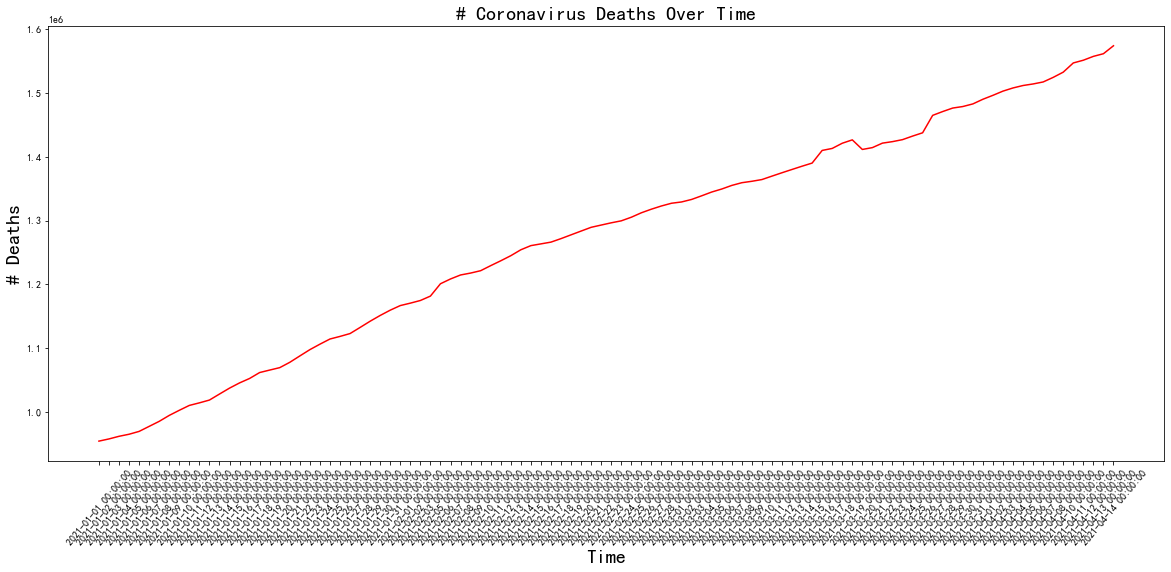

In [169]:
plt.figure(figsize=(20,8))
plt.plot(X_time.reshape(-1),total_deaths.values.tolist(), color='red')
plt.title('# Coronavirus Deaths Over Time', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('# Deaths', size=20)
plt.xticks(rotation=50, size=10)
plt.show()

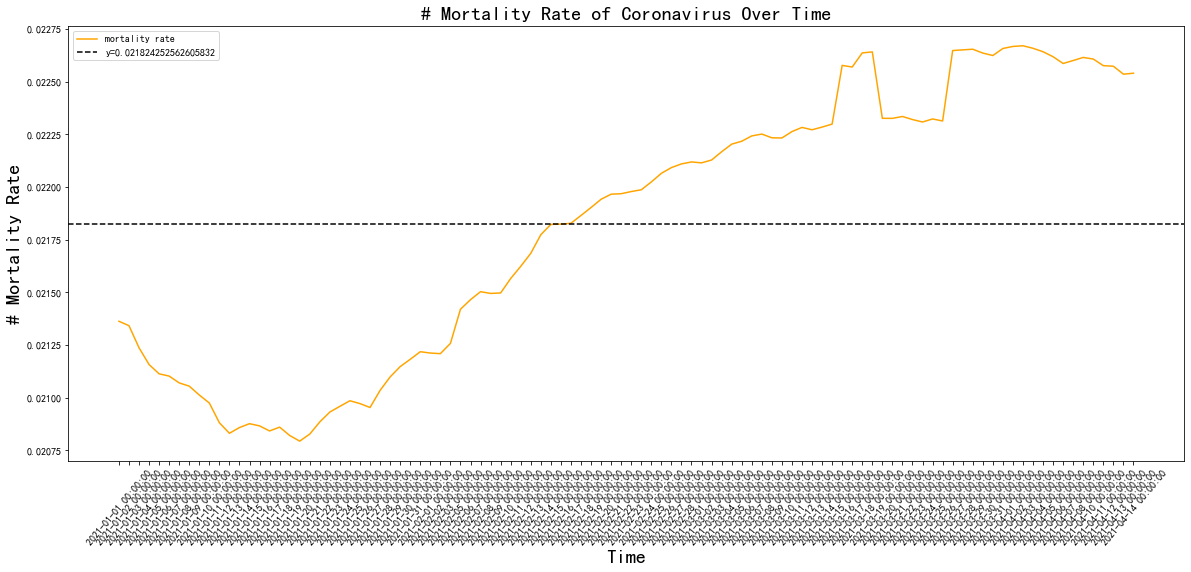

In [175]:


mortality_rate  = total_deaths / world_cases
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,8))
plt.plot(X_time.reshape(-1), mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('# Mortality Rate of Coronavirus Over Time', size=20)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=20)
plt.ylabel('# Mortality Rate', size=20)
plt.xticks(rotation=50, size=10)
plt.show()

In [194]:
total_recovered = curedCount.sum(axis=1)
total_recovered

dateId
20210101    28977869
20210102    29076399
20210103    29191067
20210104    29364839
20210105    29654650
              ...   
20210410    53522070
20210411    53724206
20210412    53937357
20210413    54190895
20210414    54490353
Length: 102, dtype: int64

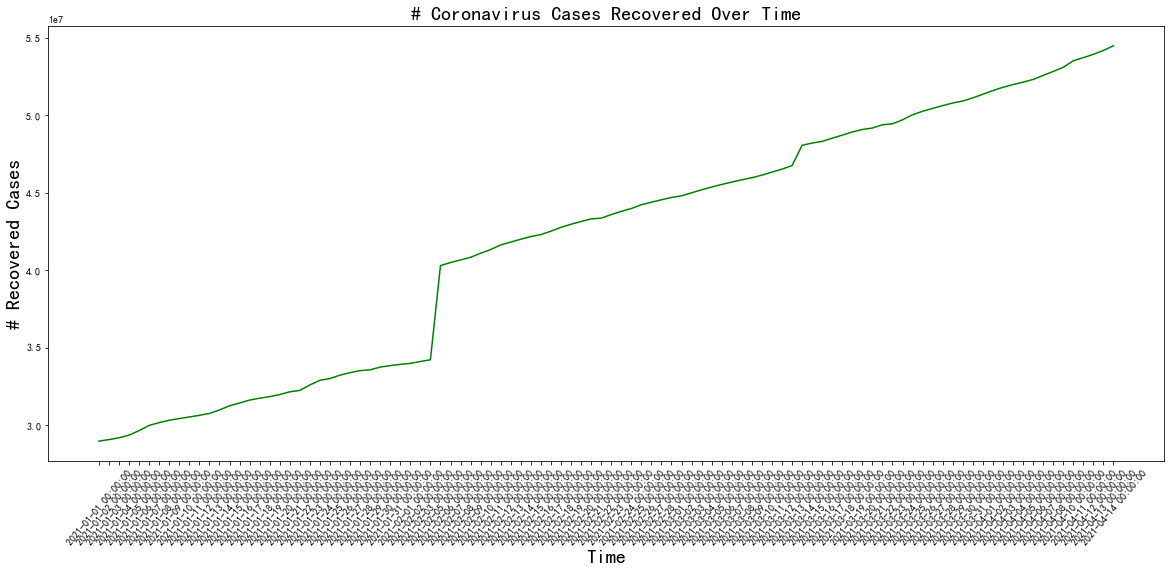

In [196]:
plt.figure(figsize=(20,8))
plt.plot(X_time.reshape(-1), total_recovered.values, color='green')
plt.title('# Coronavirus Cases Recovered Over Time', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('# Recovered Cases', size=20)
plt.xticks(rotation=50, size=10)
plt.show()

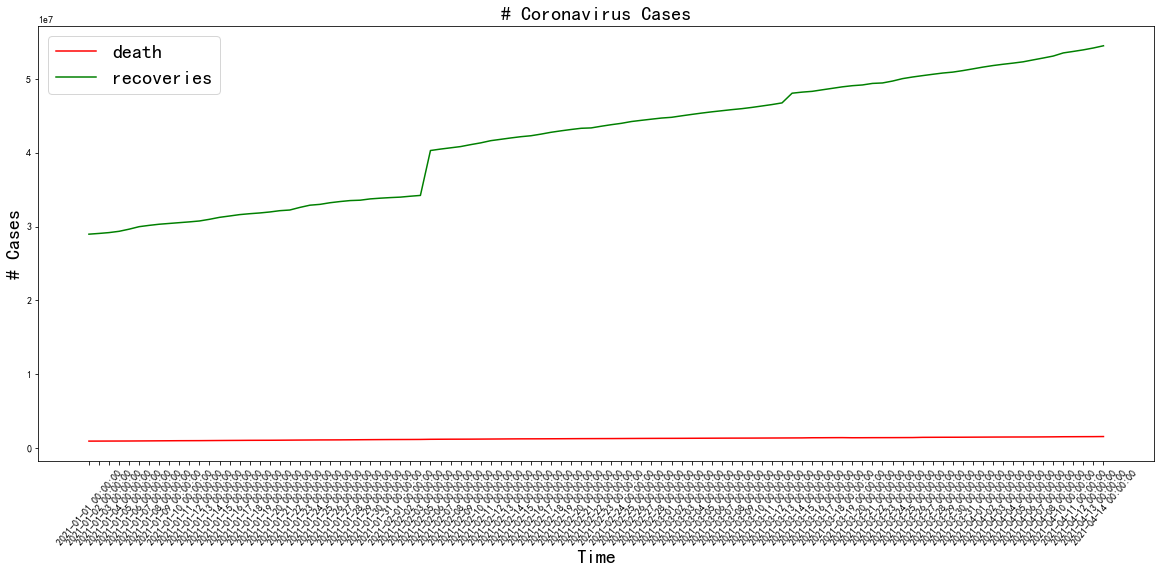

In [199]:
plt.figure(figsize=(20,8))
plt.plot(X_time.reshape(-1), total_deaths.values.tolist(), color='red')
plt.plot(X_time.reshape(-1), total_recovered.values.tolist(), color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# Coronavirus Cases', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('# Cases', size=20)
plt.xticks(rotation=50, size=10)
plt.show()

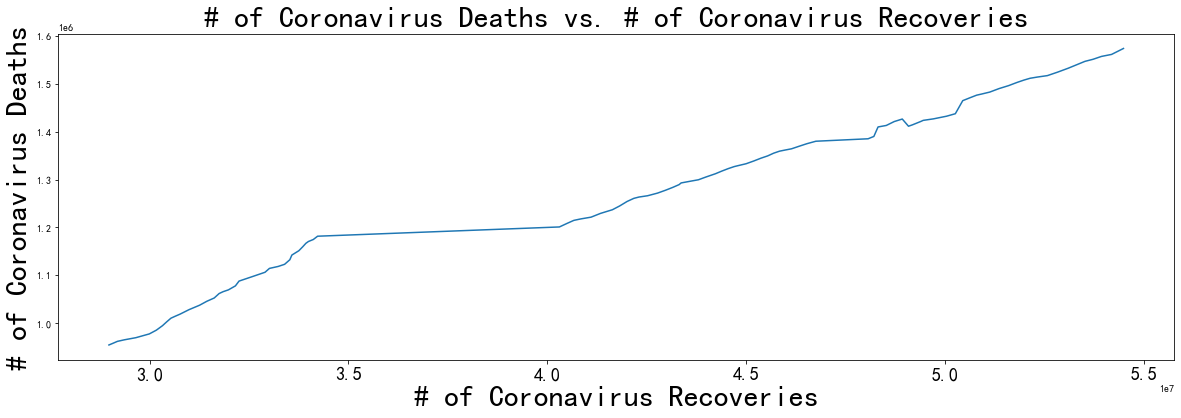

In [220]:
plt.figure(figsize=(20, 6))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=18)
plt.show()

In [228]:
list(confirmedCount.keys())

['中国', '美国', '巴西', '印度', '巴基斯坦', '英国', '阿富汗', '墨西哥', '南非', '乌克兰']

In [234]:
latest_confirmed = confirmedCount.iloc[-1]
latest_deaths = deadCount.iloc[-1]
latest_recoveries = curedCount.iloc[-1]
unique_countries =  list(confirmedCount.keys())
country_confirmed_cases = []
no_cases = []
print('----confirmed----')
print(latest_confirmed)
print('----death----')
print(latest_deaths)
print('----recoveries----')
print(latest_recoveries)

----confirmed----
中国        103185
美国      31538511
巴西      13601566
印度      13689453
巴基斯坦      734423
英国       4375814
阿富汗        57364
墨西哥      2286133
南非       1559960
乌克兰      1887338
Name: 20210414, dtype: int64
----death----
中国        4856
美国      568786
巴西      358718
印度      171058
巴基斯坦     15754
英国      150419
阿富汗       2529
墨西哥     210294
南非       53423
乌克兰      38225
Name: 20210414, dtype: int64
----recoveries----
中国         97838
美国      24626410
巴西      12074798
印度      12253697
巴基斯坦      641912
英国           539
阿富汗        51989
墨西哥      1815237
南非       1485315
乌克兰      1442618
Name: 20210414, dtype: int64


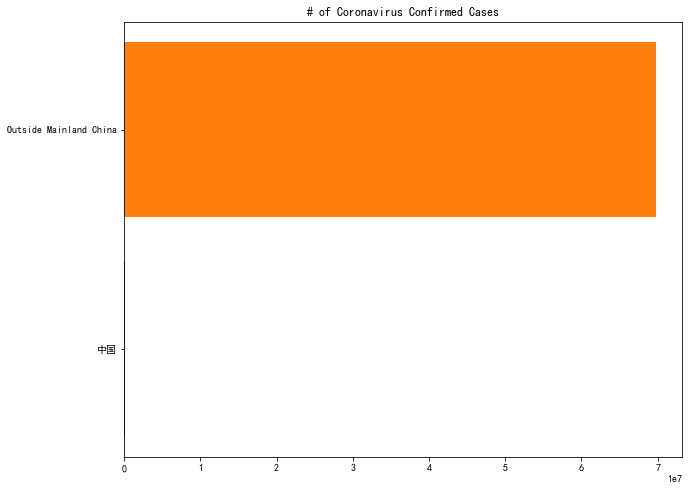

In [251]:
outside_mainland_china_confirmed = 0
for i in nameList:
    if i == '中国':
        continue;
    outside_mainland_china_confirmed += latest_confirmed[i]
plt.figure(figsize=(10, 8))
plt.barh(nameList[0], latest_confirmed[nameList[0]])
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()

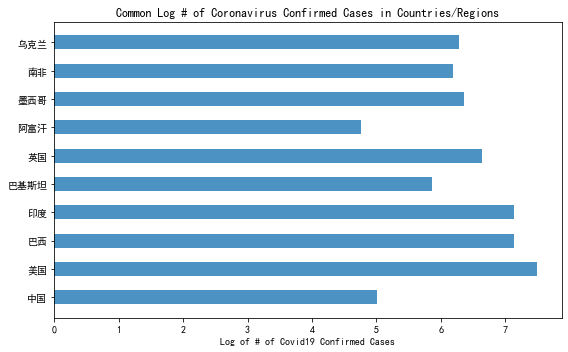

In [264]:
log_country_confirmed_cases = [math.log10(i) for i in latest_confirmed]
plt.figure(figsize=(8, 5))
plt.barh(nameList, log_country_confirmed_cases,height=0.5,alpha = 0.8)
plt.title('Common Log # of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('Log of # of Covid19 Confirmed Cases')
plt.tight_layout()
plt.show()

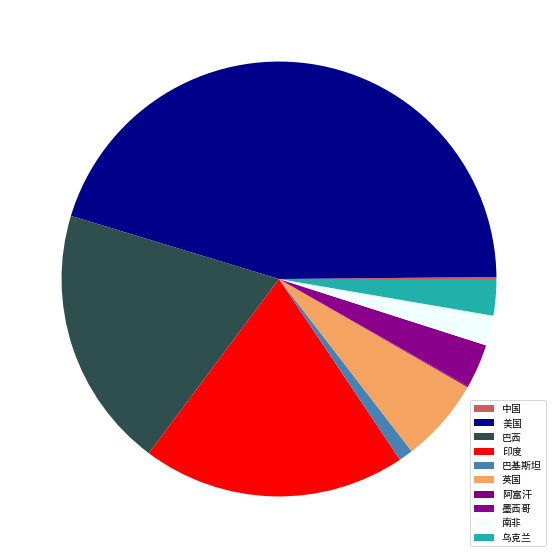

In [267]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.pie(latest_confirmed, colors=c)
plt.legend(nameList, loc='best')
plt.show()